In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# there are 46 rows each row coresponding to one node
#plot all nodes in dat with a scatter plot with the coordinates given in column 3
# in column 2, each point has connections to other points
# plot lines between points that are connected

# get the coordinates of the nodes

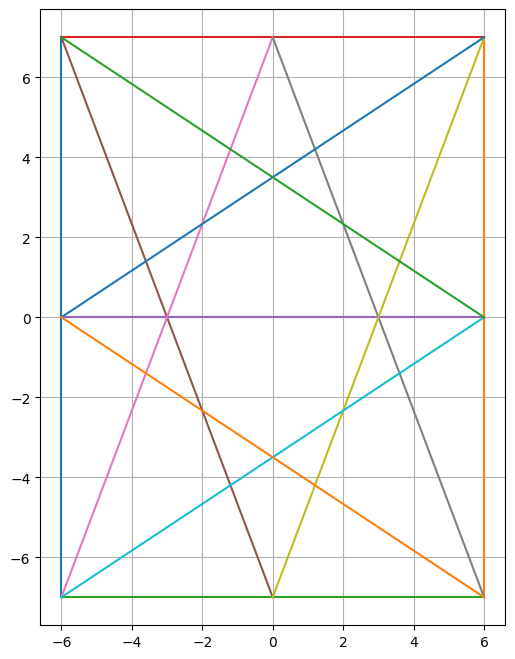

In [3]:
# plot the nodes
plt.figure(figsize=(6, 8))
# plt.scatter(xx[:11], yy[:11], color='red', label='Player 1 init')
# plt.scatter(xx[25:], yy[25:], color='blue', label='Player 2 init')
# plt.scatter(xx[11:25], yy[11:25], color='black')
# for i in range(1, 37):
#     connections = [int(k) for k in dat[2][i].split(',')]
#     print(connections)
#     for j in connections:
#         plt.plot([x[i-1], x[j-1]], [y[i-1], y[j-1]], color='black', alpha=0.5)


plt.plot([-6, -6], [-7, 7])
plt.plot([6, 6], [-7, 7])
plt.plot([-6, 6], [-7, -7])
plt.plot([-6, 6], [7, 7])
plt.plot([-6, 6], [0, 0])
plt.plot([-6, 0], [7, -7])
plt.plot([-6, 0], [-7, 7])
plt.plot([0, 6], [7, -7])
plt.plot([0, 6], [-7, 7])
plt.plot([-6, 6], [-7, 0])
plt.plot([-6, 6], [0, 7])
plt.plot([-6, 6], [0, -7])
plt.plot([-6, 6], [7, 0])
plt.grid(which='both')
plt.show()

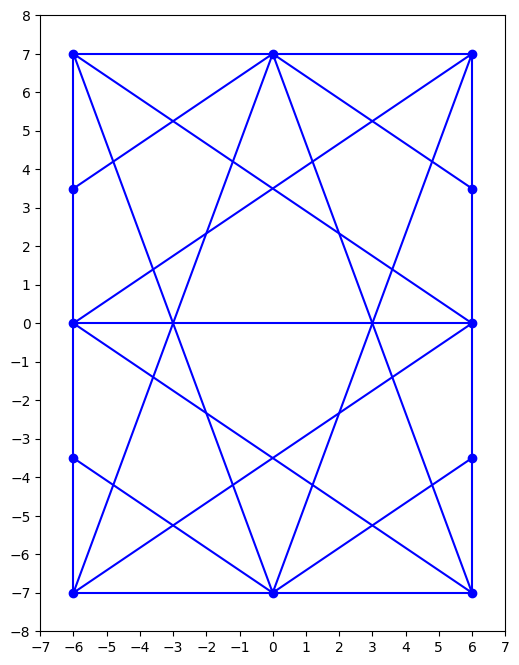

In [4]:
# Rectangle corners
corners = [
    (-6, -7),
    (6, -7),
    (-6, 7),
    (6, 7)
]

# edge midpoints
midpoints = [
    (-6, 0),
    (0, -7),
    (6, 0),
    (0, 7)
    
]

# vertical edge quarterpoints
quarterpoints = [
    (-6, -3.5),
    (6, -3.5),
    (-6, 3.5),
    (6, 3.5)
    
]

# plot the nodes
plt.figure(figsize=(6, 8))
# plt.grid()
plt.scatter([corner[0] for corner in corners], [corner[1] for corner in corners], c='b')
plt.scatter([midpoint[0] for midpoint in midpoints], [midpoint[1] for midpoint in midpoints], c='b')
plt.scatter([quarterpoint[0] for quarterpoint in quarterpoints], [quarterpoint[1] for quarterpoint in quarterpoints], c='b')

# plot the rectangle edges
plt.plot([-6, 6, 6, -6, -6], [-7, -7, 7, 7, -7], c='b')

#plot the rectangle midline
plt.plot([-6, 6], [0, 0], c='b')


#plot the lines each mid point to both the corners on the opposite edge
count = 0
for midpoint in midpoints:
    for corner in corners:
        if midpoint[0] == corner[0] or midpoint[1] == corner[1]:
            continue
        plt.plot([midpoint[0], corner[0]], [midpoint[1], corner[1]], c='b')
        count += 1

    

#plot the lines each quarter point to the mid point on the shorter edge on the same side
plt.plot([-6, 0, 6], [-3.5, -7, -3.5], c='b')
plt.plot([-6, 0, 6], [3.5, 7, 3.5], c='b')
count+=4
# plt.plot([-6, 6], [3.5, 3.5], c='pink')
# plt.plot([-6, 6], [-3.5, -3.5], c='pink')
# plt.plot([3, 3], [-7, 7], c='pink')
# plt.plot([-3, -3], [-7, 7], c='pink')
plt.xticks(range(-7, 8))
plt.yticks(range(-8, 9))

plt.show()

In [5]:
def line_from_points(p1, p2):
    if p1[0] != p2[0]:
        m = (p2[1] - p1[1])/(p2[0] - p1[0])
        c = p1[1] - m*p1[0]
        return m, c
    
    else:
        return None


def intersection(m1, c1, m2, c2):
    if m1 != m2:
        x = (c2 - c1)/(m1 - m2)
        y = m1*x + c1
        return x, y
    else:
        return None

def within_rectangle(point):
    if point[0] < -6 or point[0] > 6 or point[1] < -7 or point[1] > 7:
        return False
    return True


points = set()
# add the corners, midpoints and quarterpoints to the set of points
for i in range(4):
    points.add(corners[i])
    points.add(midpoints[i])
    # points.add(quarterpoints[i])
    

gen_points = points.copy()

In [6]:
# Finding the line parameters
line_params = set()
for i in range(len(gen_points)):
    for j in range(i+1, len(gen_points)):
        temp = line_from_points(list(gen_points)[i], list(gen_points)[j])
        if temp:
            m, c = temp
            if abs(m) == 7/6 or abs(m) == 6/7:
                continue
            line_params.add((m, c))



for i in [1, 3]:
    for j in [0, 1]:
        temp = line_from_points(midpoints[i], quarterpoints[(i+j-1)])
        if temp:
            m, c = temp
            print(temp)
            line_params.add((m, c))


line_params.add((0, -7))
line_params.add((0, 7))
line_params.add((0, 0))

(-0.5833333333333334, -7.0)
(0.5833333333333334, -7.0)
(0.5833333333333334, 7.0)
(-0.5833333333333334, 7.0)


In [7]:
# Finding the intersection points
for i in range(len(line_params)):
    for j in range(i+1, len(line_params)):
        m1, c1 = list(line_params)[i]
        m2, c2 = list(line_params)[j]
        temp = intersection(m1, c1, m2, c2)
        if temp:
            if within_rectangle(temp):
                points.add(temp)

In [8]:
for q in quarterpoints:
    points.add(tuple(q))

points_list = 0
points_list = list(points)
points_list = list(points_list)
points_list.sort(key=lambda x: x[1])
points_list = [list(point) for point in points_list]
points_list[10][1] += 0.001
points_list[25][1] -= 0.001
points_list = [tuple(point) for point in points_list]
points_list.sort(key=lambda x: x[1])

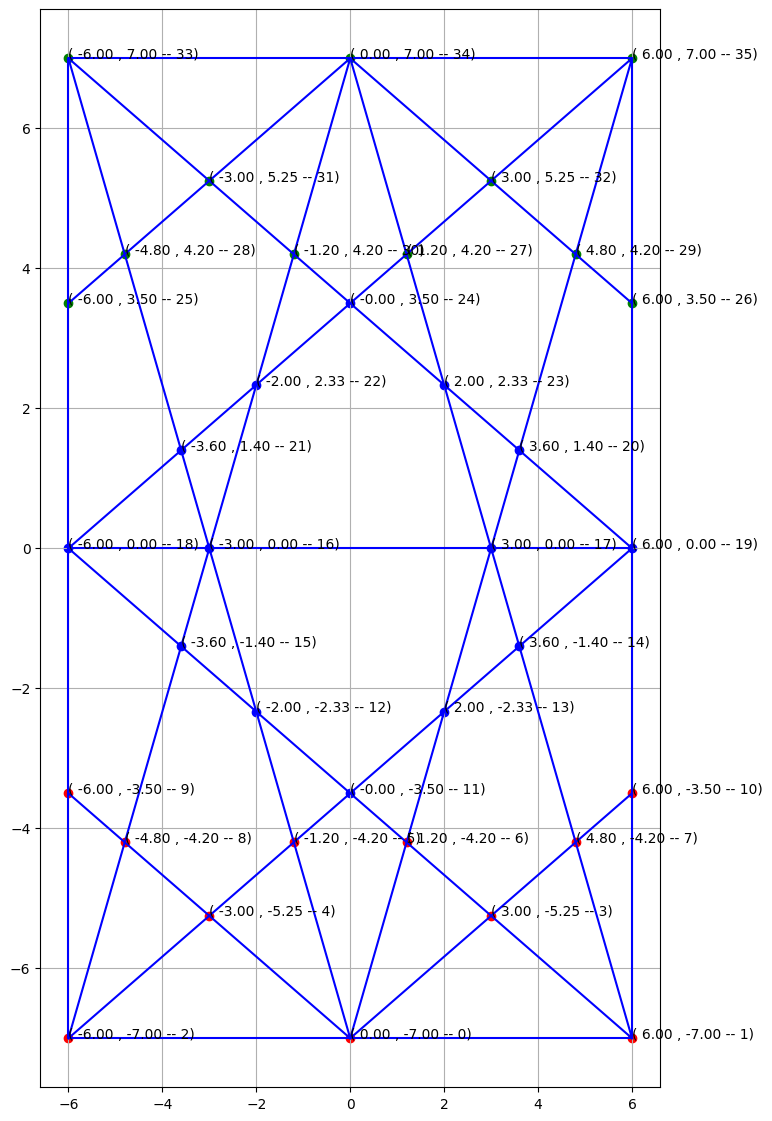

In [9]:

# plot the nodes
plt.figure(figsize=(8, 14))
plt.grid()
plt.scatter([point[0] for point in points_list[11:25]], [point[1] for point in points_list[11:25]], color='b')
plt.scatter([point[0] for point in points_list[:11]], [point[1] for point in points_list[:11]], color='r', alpha=1)
plt.scatter([point[0] for point in points_list[25:]], [point[1] for point in points_list[25:]], color='g', alpha=1)
for point in points_list:
    plt.annotate(f"( {point[0]:.2f} , {point[1]:.2f} -- {points_list.index(point)})", point)
# plt.scatter([quarter[0] for quarter in quarterpoints], [quarter[1] for quarter in quarterpoints], color='r')
for midpoint in midpoints:
    for corner in corners:
        if midpoint[0] == corner[0] or midpoint[1] == corner[1]:
            continue
        plt.plot([midpoint[0], corner[0]], [midpoint[1], corner[1]], c='b')

    

#plot the lines each quarter point to the mid point on the shorter edge on the same side
plt.plot([-6, 0, 6], [-3.5, -7, -3.5], c='b')
plt.plot([-6, 0, 6], [3.5, 7, 3.5], c='b')
plt.hlines(y=[-7, 0, 7], xmin=-6, xmax=6, color='b')
plt.vlines(x=[-6, 6], ymin=-7, ymax=7, color='b')

count+=4
plt.show()

In [10]:
connection_matrix = pd.DataFrame(index=range(36), columns=range(36))
connection_matrix = connection_matrix.fillna(0)

/tmp/ipykernel_11843/1119245605.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  connection_matrix = connection_matrix.fillna(0)


In [11]:
# with open('connections.txt', 'w') as f:
#     for i in range(len(points_list)):
#         f.write(f"\n{i}\t({points_list[i][0]:.2f},{points_list[i][1]:.2f})\t\t")
#         for j in range(len(points_list)):
#             if i == j:
#                 connection_matrix.at[i, j] = 1
#                 continue
#             else:

#                 temp = line_from_points(points_list[i], points_list[j])
#                 if temp:
#                     m, c = temp
#                     if abs(m) == 7/6 or abs(m) == 6/7:
#                         continue
#                     if np.round((m, c), 3) in np.round(list(line_params), 3):
#                             f.write(f"{j},")
#                             connection_matrix.at[i, j] = 1

#                 # For points along the edges of the rectangle
#                 else:
#                      if points_list[i][0] in [-6, 0, 6] and points_list[j][0] in [-6, 0, 6]:
#                         if points_list[i][1] in [-7, 0, 7] and points_list[j][1] in [-7,0, 7]:
#                             f.write(f"{j},")
#                             connection_matrix.at[i, j] = 1
# The above considers all the points on the same line as connected
# But we need to consider only the points that are immediate neighbours, per each slope
# We can do this by considering the point j with the shortest distance to the point i
# and checking if the line connecting the two points is within the rectangle
# How to code this?

num_points = len(points_list)
connection_matrix = pd.DataFrame(np.zeros((num_points, num_points)), dtype=int)
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)


with open('connections1.txt', 'w') as f:
    for i in range(num_points):
        f.write(f"\n{i}\t({points_list[i][0]:.2f},{points_list[i][1]:.2f})\t\t")
        min_distances = [float('inf')] * num_points  # Track minimum distances for each point
        nearest_neighbors = [-1] * num_points  # Track nearest neighbors for each point

        for j in range(num_points):
            if i == j:
                connection_matrix.at[i, j] = 1
                continue

            temp = line_from_points(points_list[i], points_list[j])
            if temp:
                m, c = temp
                if abs(m) == 7/6 or abs(m) == 6/7:
                    continue
                if np.round((m, c), 3) in np.round(list(line_params), 3):
                    dist = distance(points_list[i], points_list[j])
                    if dist < min_distances[i]:
                        min_distances[i] = dist
                        nearest_neighbors[i] = j

            else:
                if points_list[i][0] in [-6, 0, 6] and points_list[j][0] in [-6, 0, 6]:
                    if points_list[i][1] in [-7, 0, 7] and points_list[j][1] in [-7, 0, 7]:
                        dist = distance(points_list[i], points_list[j])
                        if dist < min_distances[i]:
                            min_distances[i] = dist
                            nearest_neighbors[i] = j

        if nearest_neighbors[i] != -1:
            f.write(f"{nearest_neighbors[i]},")
            connection_matrix.at[i, nearest_neighbors[i]] = 1

In [12]:
connection_matrix

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data = pd.read_csv('connections-master.txt', sep='\t+', header=None)

/tmp/ipykernel_11843/2378769754.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('connections-master.txt', sep='\t+', header=None)


In [21]:
pos = data[1].values

pos = [eval(x) for x in pos]

In [26]:
np.array(pos)[0]

array([ 0., -7.])